In [111]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 100)

In [62]:
pop = pd.read_csv('C:/Users/Ricardo/Documents/R-Projetos/Exploratory-Data-Analysis-Bancarization/data/raw/populacao_sp_2021.csv', sep=';')

# Preparing Data

In [63]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1536 entries, 0 to 1535
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   codigo_distrito  1536 non-null   int64  
 1   ano              1536 non-null   int64  
 2   faixa_etaria     1536 non-null   object 
 3   homens           1536 non-null   float64
 4   mulheres         1536 non-null   float64
 5   total            1536 non-null   int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 72.1+ KB


In [64]:
pop['codigo_distrito2'] = pop['codigo_distrito'] - 80000

In [65]:
pop[pop['codigo_distrito'] == 80001]

,codigo_distrito,ano,faixa_etaria,homens,mulheres,total,codigo_distrito2
0,80001,2021,00 a 04,2.168,2.074,4242,1
1,80001,2021,05 a 09,2.382,2.282,4664,1
2,80001,2021,10 a 14,1.997,1.934,3931,1
3,80001,2021,15 a 19,1.976,1.993,3969,1
4,80001,2021,20 a 24,2.387,2.274,4661,1
5,80001,2021,25 a 29,2.565,2.594,5159,1
6,80001,2021,30 a 34,2.963,3.001,5964,1
7,80001,2021,35 a 39,3.213,3.276,6489,1
8,80001,2021,40 a 44,3.103,3.516,6619,1
9,80001,2021,45 a 49,2.817,3.138,5955,1


### Greater than 14 years

In [66]:
pop2 = pop[~pop.faixa_etaria.isin(['00 a 04', '05 a 09', '10 a 14'])]

In [67]:
pop2[pop2['codigo_distrito'] == 80004]

,codigo_distrito,ano,faixa_etaria,homens,mulheres,total,codigo_distrito2
51,80004,2021,15 a 19,2.540,2.468,5008,4
52,80004,2021,20 a 24,3.065,3.014,6079,4
53,80004,2021,25 a 29,3.086,3.047,6133,4
54,80004,2021,30 a 34,3.310,3.340,6650,4
55,80004,2021,35 a 39,3.383,3.607,6990,4
56,80004,2021,40 a 44,3.085,3.438,6523,4
57,80004,2021,45 a 49,2.840,3.208,6048,4
58,80004,2021,50 a 54,2.728,3.053,5781,4
59,80004,2021,55 a 59,2.420,2.919,5339,4
60,80004,2021,60 a 64,2.170,2.715,4885,4


In [68]:
pop3 = pd.DataFrame(pop2.groupby('codigo_distrito2')['total'].sum())

In [69]:
pop3 = pop3.reset_index()

In [70]:
pop3.columns = ['distrito', 'pop_maior_15_anos']

In [71]:
pop3

,distrito,pop_maior_15_anos
0,1,69427
1,2,35840
2,3,68601
3,4,71238
4,5,82837
5,6,13531
6,7,62389
7,8,38802
8,9,31088
9,10,26059


In [72]:
pop3.to_csv('C:/Users/Ricardo/Documents/R-Projetos/Exploratory-Data-Analysis-Bancarization/data/processed/pop_maior_14_anos.csv', index=False)  

### Greater than 19 years

In [73]:
pop4 = pop[~pop.faixa_etaria.isin(['00 a 04', '05 a 09', '10 a 14', '15 a 19'])]

In [74]:
pop4[pop4['codigo_distrito'] == 80006]

,codigo_distrito,ano,faixa_etaria,homens,mulheres,total,codigo_distrito2
84,80006,2021,20 a 24,414.0,431.0,845,6
85,80006,2021,25 a 29,489.0,457.0,946,6
86,80006,2021,30 a 34,591.0,665.0,1256,6
87,80006,2021,35 a 39,705.0,820.0,1525,6
88,80006,2021,40 a 44,695.0,825.0,1520,6
89,80006,2021,45 a 49,618.0,704.0,1322,6
90,80006,2021,50 a 54,481.0,541.0,1022,6
91,80006,2021,55 a 59,410.0,540.0,950,6
92,80006,2021,60 a 64,394.0,514.0,908,6
93,80006,2021,65 a 69,322.0,444.0,766,6


In [75]:
pop5 = pd.DataFrame(pop4.groupby('codigo_distrito2')['total'].sum())

In [76]:
pop5 = pop5.reset_index()

In [77]:
pop5.columns = ['distrito', 'pop_maior_19_anos']

In [78]:
pop5

,distrito,pop_maior_19_anos
0,1,65458
1,2,34113
2,3,62256
3,4,66230
4,5,77007
5,6,12732
6,7,59794
7,8,36309
8,9,28837
9,10,24291


In [79]:
pop5.to_csv('C:/Users/Ricardo/Documents/R-Projetos/Exploratory-Data-Analysis-Bancarization/data/processed/pop_maior_19_anos.csv', index=False)  

# Enrichment

In [102]:
sp_shp = gpd.read_file('C:/Users/Ricardo/Documents/R-Projetos/Exploratory-Data-Analysis-Bancarization/data/raw/municipio_sp.shp')

In [104]:
sp_shp

,CLASSID,FEATID,REVISIONNU,NOME_DIST,SIGLA_DIST,COD_DIST,COD_SUB,DATA_CRIAC,USUARIO_ID,geometry
0,4.0,8583485.0,1.0,JOSE BONIFACIO,JBO,47,27,2007-03-19,0.0,"POLYGON ((352436.869 7394174.148, 352450.740 7..."
1,4.0,8583484.0,1.0,JD SAO LUIS,JDS,46,18,2007-03-19,0.0,"POLYGON ((320696.639 7383620.282, 320699.486 7..."
2,4.0,8583445.0,1.0,ARTUR ALVIM,AAL,5,21,2007-03-19,0.0,"POLYGON ((349461.276 7397764.525, 349461.935 7..."
3,4.0,8583479.0,1.0,JAGUARA,JAG,40,08,2007-03-19,0.0,"POLYGON ((320731.080 7400614.592, 320732.386 7..."
4,4.0,8583437.0,1.0,VILA PRUDENTE,VPR,93,29,2007-03-19,0.0,"POLYGON ((338651.039 7392203.484, 338654.034 7..."
5,4.0,8583480.0,1.0,JAGUARE,JRE,41,08,2007-03-19,0.0,"POLYGON ((320606.161 7394439.116, 320608.927 7..."
6,4.0,8583481.0,1.0,JARAGUA,JAR,42,02,2007-03-19,0.0,"POLYGON ((320069.659 7407622.486, 320069.992 7..."
7,4.0,8583482.0,1.0,JD HELENA,JDH,44,23,2007-03-19,0.0,"POLYGON ((353421.390 7401397.366, 353420.401 7..."
8,4.0,8583483.0,1.0,JD PAULISTA,JDP,45,11,2007-03-19,0.0,"POLYGON ((329650.535 7390883.219, 329645.838 7..."
9,4.0,8583486.0,1.0,LAJEADO,LAJ,96,28,2007-03-19,0.0,"POLYGON ((354138.975 7396739.337, 354136.244 7..."


In [105]:
sp_shp['COD_DIST'] = sp_shp['COD_DIST'].astype('int64') 

In [106]:
sp_shp_agg = sp_shp.merge(pop3, how='left',left_on='COD_DIST', right_on='distrito')

In [107]:
sp_shp_agg = sp_shp_agg.merge(pop5, how='left',left_on='COD_DIST', right_on='distrito')

In [108]:
sp_shp_agg

,CLASSID,FEATID,REVISIONNU,NOME_DIST,SIGLA_DIST,COD_DIST,COD_SUB,DATA_CRIAC,USUARIO_ID,geometry,distrito_x,pop_maior_15_anos,distrito_y,pop_maior_19_anos
0,4.0,8583485.0,1.0,JOSE BONIFACIO,JBO,47,27,2007-03-19,0.0,"POLYGON ((352436.869 7394174.148, 352450.740 7...",47,112070,47,102489
1,4.0,8583484.0,1.0,JD SAO LUIS,JDS,46,18,2007-03-19,0.0,"POLYGON ((320696.639 7383620.282, 320699.486 7...",46,234998,46,215021
2,4.0,8583445.0,1.0,ARTUR ALVIM,AAL,5,21,2007-03-19,0.0,"POLYGON ((349461.276 7397764.525, 349461.935 7...",5,82837,5,77007
3,4.0,8583479.0,1.0,JAGUARA,JAG,40,08,2007-03-19,0.0,"POLYGON ((320731.080 7400614.592, 320732.386 7...",40,19980,40,18694
4,4.0,8583437.0,1.0,VILA PRUDENTE,VPR,93,29,2007-03-19,0.0,"POLYGON ((338651.039 7392203.484, 338654.034 7...",93,88100,93,82721
5,4.0,8583480.0,1.0,JAGUARE,JRE,41,08,2007-03-19,0.0,"POLYGON ((320606.161 7394439.116, 320608.927 7...",41,45185,41,41683
6,4.0,8583481.0,1.0,JARAGUA,JAR,42,02,2007-03-19,0.0,"POLYGON ((320069.659 7407622.486, 320069.992 7...",42,169714,42,154212
7,4.0,8583482.0,1.0,JD HELENA,JDH,44,23,2007-03-19,0.0,"POLYGON ((353421.390 7401397.366, 353420.401 7...",44,104992,44,95353
8,4.0,8583483.0,1.0,JD PAULISTA,JDP,45,11,2007-03-19,0.0,"POLYGON ((329650.535 7390883.219, 329645.838 7...",45,78846,45,75767
9,4.0,8583486.0,1.0,LAJEADO,LAJ,96,28,2007-03-19,0.0,"POLYGON ((354138.975 7396739.337, 354136.244 7...",96,136321,96,123505


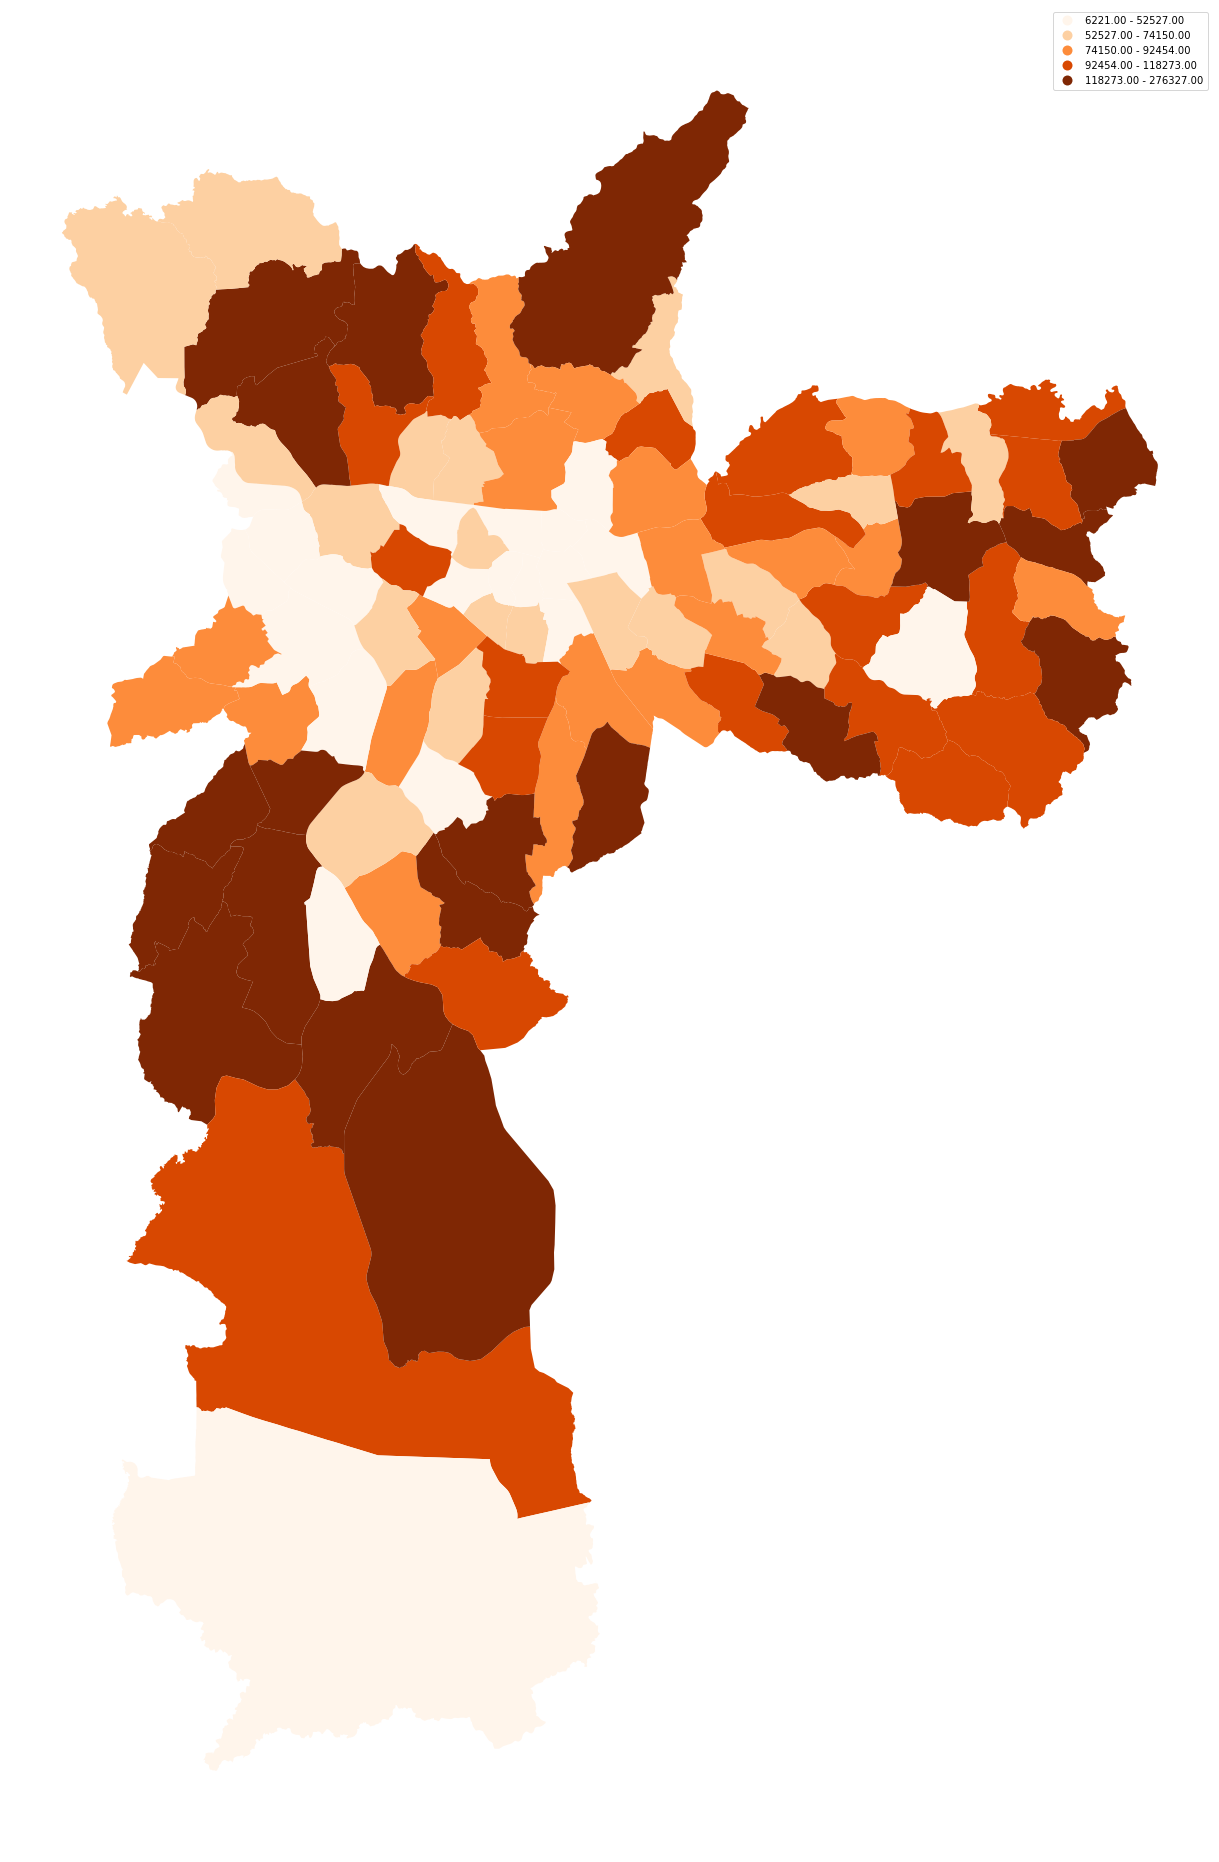

In [115]:
fig, ax = plt.subplots(figsize=(40,34))

# Set bg colors
ax.set(facecolor = "white")
fig.patch.set_facecolor('white')

# Plot
sp_shp_agg.plot(column='pop_maior_19_anos', scheme="quantiles", k= 5, cmap="Oranges", legend=True, ax=ax)

ax.axis("off")
plt.show()

In [109]:
sp_shp_agg.to_file("C:/Users/Ricardo/Documents/R-Projetos/Exploratory-Data-Analysis-Bancarization/data/processed/sp_pop_shp/sp_pop_shp.shp")